<a href="https://colab.research.google.com/github/heidimag/DS1000/blob/main/Heidi_Maguella_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import randn
from numpy import percentile
%matplotlib inline

# Question 5

In [ ]:
mean = 53
std = 30

#a. Proportion of the fish w/ fin length < 3.1 cm
proportion_A = norm.cdf(3.1, loc=53, scale=30)
print("The proportion of fish that have fin length less than 3.1 cm is", proportion_A)

#b. Proportion of the fish w/ fin length > 147 cm
proportion_B = 1 - norm.cdf(147, loc=53, scale=30)
print("\nThe proportion of fish with fin length greater than 147 cm is",proportion_B)

#c. How to calculate the proportion of fish between 77-88 cm
"""
You can calculate it by doing substracting the proportion of
fin length for 88cm from the proportion of fin length for 77cm.
"""

#d. Calculate proportion illustrated in part c
proportion_C = norm.cdf(87, loc=53, scale=30) - norm.cdf(77, loc=53, scale=30)
print("\nThe proportion of fish with fin length between 77 cm and 87 cm is", proportion_C)

#e.Value of fin length giving 10% of fish above it
value = norm.ppf(0.90, loc=53, scale=30)
print("\nThe value of fin length giving 10% of fish above it is",value)


The proportion of fish that have fin length less than 3.1 cm is 0.048122864911539935

The proportion of fish with fin length greater than 147 cm is 0.0008641652090980445

The proportion of fish with fin length between 77 cm and 87 cm is 0.08331824924098163

The value of fin length giving 10% of fish above it is 91.44654696633802


# Question 6


In [ ]:
# a. Proportion of values < 3 stds above the mean for a standard normal distribution
proportion = norm.cdf(3)
print("The proportion of values < 3 stds above the mean for a standard normal distribution is",proportion)

The proportion of values < 3 stds above the mean for a standard normal distribution is 0.9986501019683699


In [ ]:
# b. Write a function called `stats_normal` with argument `n`
def stats_normal(n):
    sample = np.random.normal(0, 1, n)
    mean = np.mean(sample)
    std = np.std(sample)
    proportion = np.mean(sample < (mean + 3 * std))
    return {'mean': mean, 'std': std, 'proportion': proportion}

#c Set random.seed at 5 with n being 50,500,5000
np.random.seed(5)
print(stats_normal(50))
print(stats_normal(500))
print(stats_normal(5000))

#d
"""
For the results in part c, we can notice a pattern where the mean decreases,
the standard deviation increases, and the proportion of values that are less
than 3 standard deviations above the mean decreases to approach the value
calculated in part a.
"""

{'mean': 0.0964383003251101, 'std': 0.8468753963781641, 'proportion': 1.0}
{'mean': 0.02446888341478193, 'std': 0.9892903791894276, 'proportion': 1.0}
{'mean': -0.005748670892345629, 'std': 1.0135890418571463, 'proportion': 0.9984}


# Question 7


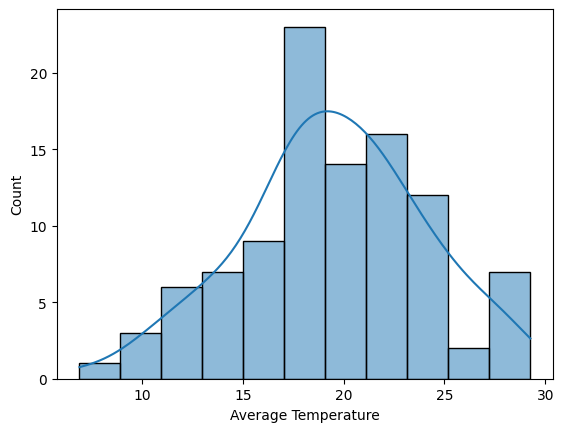


The mean of average temperatures is 19.4809
The standard deviation of average temperatures is 4.541057834087257

The proportion is 0.66




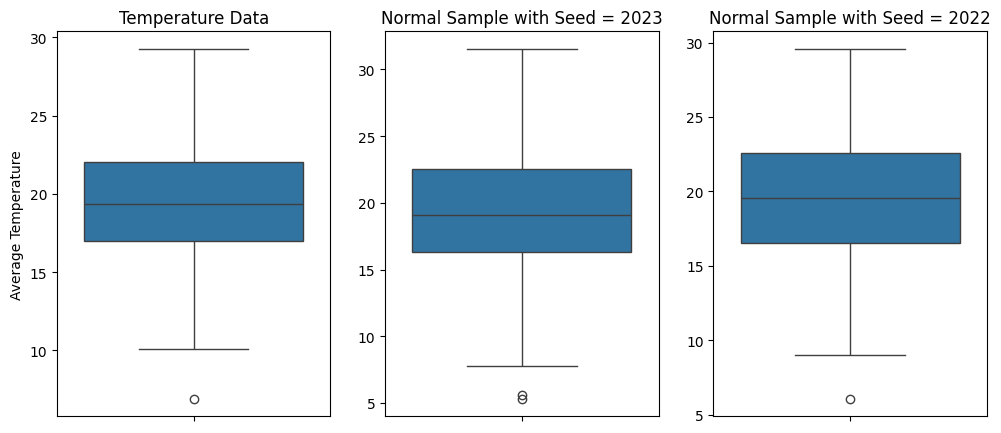

In [ ]:
# a  Histogram of the average temperature with the density curve estimate on the same plot
data = pd.read_csv('temperature.csv')
sns.histplot(data['Average Temperature'], kde=True)
plt.show()
# The distribution's shape is normal but has a slight left skewness


#b Calculate the mean and std of the average temperature
mean = data['Average Temperature'].mean()
std = data['Average Temperature'].std()
print("\nThe mean of average temperatures is",mean)
print("The standard deviation of average temperatures is",std)

#c
interval_data = data[(data['Average Temperature'] > (mean - std)) &
 (data['Average Temperature'] < (mean + std))]
proportion = len(interval_data) / len(data)
print("\nThe proportion is",proportion)
"""
By comparing the two proportions, the calculated proportion
is smaller than the theoritical one. 66% < 68%. This is not
surprising as the data is slightly skewed to the left.
"""
"""
Based on my results, there appears to be a slight departure from the
normal distribution. We can guess that the data is slightly skewed to
the left, which aligns with the histogram created in part a. Again, this
slight deviation is due to the data being slightly skewed to the left.
"""

#d
print("\n") # formatting
plt.figure(figsize=(12, 5)) # formatting

# set random.seed(2023)
np.random.seed(2023)
normal_distribution = np.random.normal(mean, std, len(data))

plt.subplot(1, 3, 1)
sns.boxplot(data['Average Temperature'])
plt.title('Temperature Data')

plt.subplot(1, 3, 2)
sns.boxplot(normal_distribution)
plt.title('Normal Sample with Seed = 2023')

# set random.seed(2022)
np.random.seed(2022)
normal_distribution_2 = np.random.normal(mean, std, len(data))

plt.subplot(1, 3, 3)
sns.boxplot(normal_distribution_2)
plt.title('Normal Sample with Seed = 2022')

plt.show()